<a href="https://colab.research.google.com/github/ashikshafi08/Learning_Tensorflow/blob/main/Other%20Courses/Getting_Started_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook contains all the materials and notes for the Getting Started with TensorFlow 2 Course by Imperial College London. 



In [1]:
# Importing TensorFlow 
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 

## The Sequential model API 

### Build a Sequential Model 

It's really easy and intuitive way to construct a deeplearning models. Probably most of the neural networks that we work with, can be built using the Sequential Class. 

This will have the list of keras layers. 

In [2]:
# Importing the layers we're going to use 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , Softmax 

Build a feedforward neural network model

In [3]:
model = tf.keras.Sequential([
  Flatten(input_shape = (28 , 28)) , # Explicitly specifying the input_shape (to build the model) 
  Dense(16 , activation = 'relu') , 
  Dense(10 , activation = 'relu'), 
  Dense(10 , activation= 'relu') , 
  #Dense(10 , activation = 'sigmoid')
  tf.keras.layers.Activation('sigmoid')
])

# Getting the model summary 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 12,840
Trainable params: 12,840
Non-trainable params: 0
_________________________________________________________________


### Convolutional and Pooling Layers in TensorFlow 

Previously we build our models with Feedforward networks, but now will use Convolutional layers to build our model.

In [4]:
# Importing the needed packages 
from tensorflow.keras.layers import Flatten, Dense , Conv2D , MaxPooling2D

In [5]:
# Building a Convolutional Model 
model = tf.keras.Sequential([
  Conv2D(filters= 16 , kernel_size= 3 , 
         activation = 'relu' , input_shape = (32 , 32 , 3)) , 
  MaxPooling2D(pool_size= 3) , 
  Flatten() , 
  Dense(64 ,  activation= 'relu'), 
  Dense(10 , activation= 'softmax')
])

# Getting the summary of the model 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 103,562
Trainable params: 103,562
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(32 , kernel_size=3 , padding = 'SAME' , strides = 2 , input_shape = (224 , 224, 3)) , 
    MaxPooling2D(3), 
    Conv2D(16 , 3 , 2),
    Flatten(),
    Dense(30 , activation = 'relu'),
    Dense(10 , activation = 'sigmoid')
])

# Summary of the model 
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 112, 112, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 16)        4624      
_________________________________________________________________
flatten_2 (Flatten)          (None, 5184)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 30)                155550    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                310       
Total params: 161,380
Trainable params: 161,380
Non-trainable params: 0
________________________________________________

### Weight and bias initializers 
Will discuss the different ways to intialize weights and biases in the layers of neural networks.

#### Default weight and biases
The models we've worked so far, we have not specified the **initial values of the weights and biases** in each layers. 

Tensorflow set's the default value depends upon what type of layer's we are using. 

For instance, 
- In `Dense` layer the **biases** are set to zero (`zeros`) by default. 
- While the **weights** are set according to the `glorot_uniform`, or the Glorot uniform initializer. 



#### Initializing your own weights and biases 

We can even initialize our own weights and biases, and TensorFlow makes the process quite straightforward. 

This can be achieved by using tweaking two optional arguments in each layer, 
- `kernel_initialiser` - for weights. 
- `bias_initialiser` - for the biases. 

Note: For `MaxPooling` layers we need not to specify the weights and biases. Will throw an error. 

Let's initialize the weights and biases by ourselves. 

In [7]:
# Importing again (to make a practice)
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Flatten, Dense , Conv2D , MaxPool2D

In [8]:
# Constructing a model (with manual weight and bias initializer)

model = Sequential([
  Conv2D(16 , 3 , kernel_initializer='random_uniform' , 
         bias_initializer = 'zeros' , activation = 'relu' 
         , input_shape = (224 ,224 , 3)), 
  MaxPooling2D(3) , 
  Flatten(), 
  Dense(64, kernel_initializer= 'he_uniform' , bias_initializer='ones' , 
        activation = 'relu'), 
  
])

We can even instantiate initialisers in slightly different manner, allowing us to set optional arguments of the initalisation metod. 

- https://keras.io/api/layers/initializers/
- https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/initializers

In [9]:
# Slightly different method for more flexibility 

model = Sequential([
  Conv2D(16 , 3 , kernel_initializer='random_uniform' , 
         bias_initializer = 'zeros' , activation = 'relu' 
         , input_shape = (224 ,224 , 3)), 
  MaxPooling2D(3) , 
  Flatten(), 
  Dense(64, kernel_initializer= 'he_uniform' , bias_initializer='ones' , 
        activation = 'relu'), 
  Dense(64 , kernel_initializer= tf.keras.initializers.TruncatedNormal(mean = 0.0 , stddev= 0.05) , 
        bias_initializer = tf.keras.initializers.Zeros() , 
        activation = 'relu') , 
        Dense(8 , kernel_initializer= tf.keras.initializers.Orthogonal(gain = 1.0 , seed = None) , 
              bias_initializer = tf.keras.initializers.Constant(value = 0.4) , 
              activation = 'relu')
  
])

# Getting the summary of the model 
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 87616)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                5607488   
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 520       
Total params: 5,612,616
Trainable params: 5,612,616
Non-trainable params: 0
____________________________________________

#### Custom weight and bias initializers 

It's also possible to define your own weight and bias initializers. 

But the initializers must take in two arguments, 
- the `shape` of the tensor to be initialized. 
- the `dtype`.

In [10]:
import tensorflow.keras.backend as K 

In [11]:
# Define a custom initializer 

def my_init(shape , dtype = None):
  return K.random_normal(shape , dtype = dtype)

# Checking how our initializer works
model = Sequential([
  Flatten(input_shape = (28 , 28) ) , 
  Dense(64 , kernel_initializer= my_init)
])

# Summary of the model 
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                50240     
Total params: 50,240
Trainable params: 50,240
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.weights[:10]

[<tf.Variable 'dense_11/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[ 1.500213  ,  1.1346418 ,  0.10545535, ...,  0.10540758,
          0.11533674, -1.9752905 ],
        [-1.6522237 , -0.3103279 , -2.2584739 , ...,  0.61326873,
          0.45249227, -0.45374393],
        [-1.8552982 ,  0.58084553, -0.585883  , ...,  0.5207689 ,
          0.35898057,  1.6316472 ],
        ...,
        [ 0.25915584,  0.10628422,  1.2008153 , ...,  2.3873706 ,
         -0.3310704 ,  1.320011  ],
        [-1.4012593 ,  0.58512574,  1.2481849 , ..., -0.2604794 ,
         -0.74825394,  0.5952679 ],
        [-0.48689404, -0.3252199 , -0.06009065, ..., -0.16006908,
          1.7024039 ,  2.7214754 ]], dtype=float32)>,
 <tf.Variable 'dense_11/bias:0' shape=(64,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

We can even visualize the initialized weights and biases to see the effect of them.

In [13]:
# Filter our the pooling and flatten layers, because they don't have any weights
weight_layers = [layer for layer in model.layers if len(layer.weights) > 0]

weight_layers

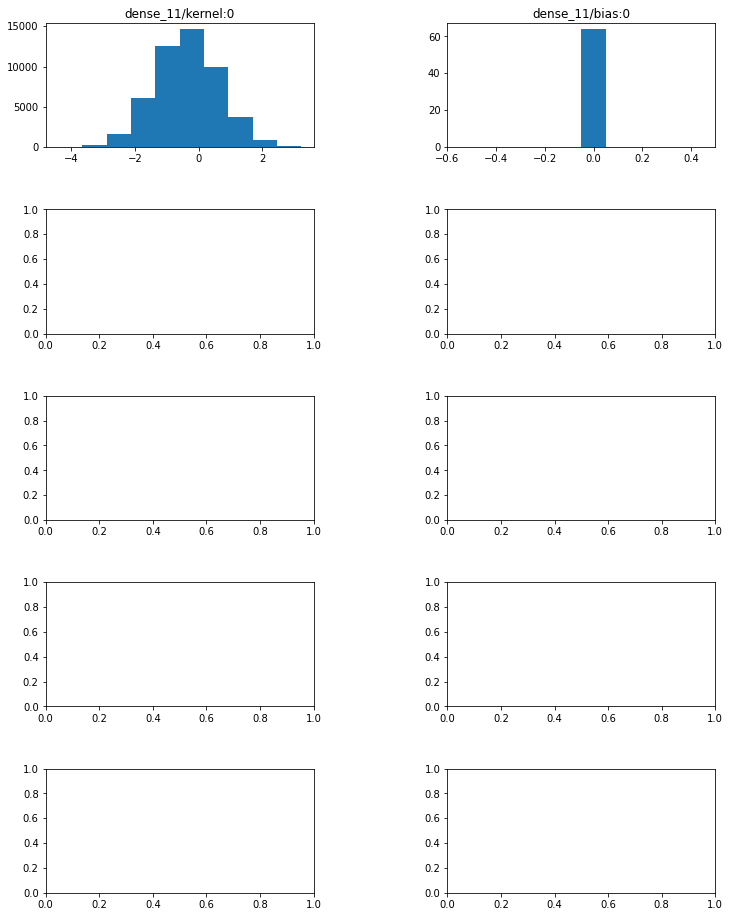

In [14]:
# Plot histograms of weight and bias values 

fig , axes = plt.subplots(5 , 2 , figsize = (12 , 16))
fig.subplots_adjust(hspace= 0.5 , wspace = 0.5)

for i , layer in enumerate(weight_layers):
  for j in [0 , 1]:
    axes[i , j].hist(layer.weights[j].numpy().flatten() , align = 'left')
    axes[i , j].set_title(layer.weights[j].name)

### Compiling our model 
We saw how to build a model but to start training the model on our data we need to specify: 
- loss function 
- optimization function 
- a metric 

To do this we use `compile` to specify all the above 3 things in order to get our model ready for training.  

In [15]:
# Let's build a simple binary classification model 

model = Sequential([
  Dense(64 , activation= 'elu' , input_shape = (32,)) , 
  Dense(1 , activation = 'sigmoid')
])

# Now our important step is to compile our model 
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits= True) , 
              optimizer = tf.keras.optimizers.SGD(learning_rate= 0.001 , momentum= 0.9 , 
                                                  nesterov = True) , 
              metrics = [tf.keras.metrics.BinaryAccuracy(threshold= 0.7) , 
                         tf.keras.metrics.MeanAbsoluteError()])

Writing in a object format, it gives us more flexibility to tweak the parameter values. 

In [16]:
# Getting the summary of our model 
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
Total params: 2,177
Trainable params: 2,177
Non-trainable params: 0
_________________________________________________________________


In [17]:
# What's stored in the model 
print(model.optimizer)
print(model.loss)
print(model.metrics)

[]


In [18]:
# Printing the learning rate of the optimizer 
model.optimizer.lr

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>

#### **Metrics in Keras**
 
We will explore the different metrics in keras. 

One of the most common metrics used for classification problem in Keras is `accuracy`. 

In [19]:
# Compile the model 
model.compile(loss = 'sparse_categorical_crossentropy' , 
              optimizer = 'Adam' , 
              metrics = ['accuracy'])

We now have a model that uses accuracy as a metric to judge the performance. 

But how is this metric actually calculated? We can break this in two cases. 

**Case 1 - Binary Classification with sigmoid activation function**

We are training a model for binary classification problem with a sigmoid activation function in the output layer (Cat or Dog). 

- Given the input, the model will output a float between 0 and 1. 
- Based on whether the float is less than or greater than the `threshold` of the accuracy (default it's 0.5). 
- We round the float to get the predicted classification from the model (`y_pred`).

This accuracy metric compares, 
- the value `y_pred` on each training examples. 
- with the true output `y_true` will be an one hot encoded vector. 

Atlast the accuracy computes the mean of 𝛿(𝑦(𝑖)𝑝𝑟𝑒𝑑,𝑦(𝑖)𝑡𝑟𝑢𝑒) over all training examples.


In [20]:
# Let's see in code how it's implemented (Sigmoid Function)

y_true = tf.constant([0.0 , 1.0 , 1.0]) # the class 
y_pred = tf.constant([0.4 , 0.8 , 0.3]) # the prediction prob of y_true 

# Accuracy
accuracy = K.mean(K.equal(y_true , K.round(y_pred))) 
print(f'The overall accuracy (taking mean over all the examples): {accuracy} ')


The overall accuracy (taking mean over all the examples): 0.6666666865348816 


**Case 2 - Categorical Classification** 

Imagine we want to train a model for the classification problem which has more than 1 classes (Dog breeds), we use a activation function called `softmax` in the last layer. 

Given the training examples X(i) the model will output a tensor of probabilities 𝑝1,𝑝2,…𝑝𝑚 according to the model that x(i) falls into each class. 

Here the accuracy metric works a bit differetn rather comparing to the value of y_true, 
- it determines the largest argument in the `y_pred` tensor of one sample. 
- Then compares the index to the index of the maximum value of 𝑦(𝑖)𝑡𝑟𝑢𝑒 to determine the 𝛿(𝑦(𝑖)𝑝𝑟𝑒𝑑,𝑦(𝑖)𝑡𝑟𝑢𝑒). 
- It then computes the accuracy in the same way as for binary classification case. 

*Note*: The accuracy of binary classificaton problems is the same, no matter if we use a sigmoid or softmax activation function to obtain the output. 

In [21]:
# Binary classification with softmax 

y_true = tf.constant([[0.0 , 1.0] , [1.0 , 0.0] , 
                      [1.0 , 0.0] , [0.0 , 1.0]])

y_pred = tf.constant([[0.4 , 0.6] , [0.3 , 0.7] , 
                      [0.05 , 0.95] , [0.33 , 0.67]])

accuracy = K.mean(K.equal(y_true , K.round(y_pred)))
accuracy

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [22]:
# Categorical classification when m > 2 (num_classes > 2)

y_true = tf.constant([[0.0,1.0,0.0,0.0],[1.0,0.0,0.0,0.0],[0.0,0.0,1.0,0.0]])
y_pred = tf.constant([[0.4,0.6,0.0,0.0], [0.3,0.2,0.1,0.4], [0.05,0.35,0.5,0.1]])

# We need to find the maximum index (argmax)
accuracy = K.mean(K.equal(K.argmax(y_true , axis = -1) , K.argmax(y_pred , axis = -1)))
accuracy

<tf.Tensor: shape=(), dtype=float32, numpy=0.6666667>

Let's compile our model with different accuracy.

In [23]:
# Compile the model with different accuracy 

# Binary Accuracy 
model.compile(optimizer = 'Adam' , 
              loss = 'sparse_categorical_crossentropy' , 
              metrics = [tf.keras.metrics.BinaryAccuracy(threshold = 0.5)])


**Sparse Categorical Accuracy** 

Very similar metric to categorical accuracy with one major difference. 

That is the label `y_true` of each training examples is not expected to be a one hot encoded vector. 

But to be tensor consisting of single integer. This index is compared to the index of the maximum argument `y_pred`. 

In [24]:
# Using Sparse Categorical Accuracy 

model.compile(loss = 'sparse_categorical_crossentropy' , 
              optimizer ='adam' , 
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])

**(Sparse) Top k - categorical accuracy**

In top k-categorical accuracy, 
- Instead of computing how often the mdoel correctly predicts the label of a training example. 
- Here the metric computes how often the model has `y_true` in the top-k of if it's prediction. By default **k = 5**

There is two version of it: 
- `tf.keras.metrics.SparseTopKCategoricalAccuracy()`
- `tf.keras.metrics.TopKCategoricalAccuracy()`

In [25]:
# Sparse Categorical 
def sparse_categorical_accuracy(y_true, y_pred ):
    return K.cast( K.equal(K.max(y_true, axis=-1),
                          K.cast(K.argmax(y_pred, axis=-1), K.floatx()) ),
                  K.floatx())

In [26]:
# Top k categorical
def top_k_categorical_accuracy(y_true, y_pred, k=5):
    return K.mean(K.in_top_k(y_pred, K.argmax(y_true, axis=-1), k), axis=-1)

In [27]:
# For the Sparse one 

def sparse_top_k_categorical_accuracy(y_true , y_pred , k= 5):
  return K.mean(K.in_top_k(y_pred , K.cast(K.max(y_true , axis = -1), 
                                           'int32') , k) , axis = 1)

Things to refer: 
- https://keras.io/metrics/
- https://github.com/keras-team/keras/blob/master/keras/metrics.py

### The Fit method 

In [28]:
# Let's build a model and fit it. 
model = Sequential([
  Dense(64 , activation= 'elu' , input_shape = (32 ,)), 
  Dense(100 , activation= 'softmax')
])

# Compile the model 
model.compile(loss = 'categorical_crossentropy' , 
              optimizer = 'rmsprop' , 
              metrics = ['accuracy'])

# Fitting the model 
# model.fit(X_train , y_train)

# X_train (num_samples , num_features)
# y_train (num_samples , num_classes)

In [29]:
# Let's build a model and fit it. 
model = Sequential([
  Dense(64 , activation= 'elu' , input_shape = (32 ,)), 
  Dense(100 , activation= 'softmax')
])

# Compile the model 
model.compile(loss = 'sparse_categorical_crossentropy' , 
              optimizer = 'rmsprop' , 
              metrics = ['accuracy'])

# Fitting the model 
# history = model.fit(X_train , y_train , epochs = 10)

# X_train (num_samples , num_features)
# y_train (num_samples , ) # one dimensional array with lenght == num_samples



`history` --> TensorFlow history object which contains the record and progress of the model training. In terms of loss , metrics , epochs and whatever we pass in.

It's time to work on a real data! 

In [30]:
# Load the Fashion-MNIST dataset 

fashion_mnist_data = tf.keras.datasets.fashion_mnist

# Splitting into sets 
(train_images , train_labels) , (test_images , test_labels) = fashion_mnist_data.load_data()


# Checkin the shapes 
train_images.shape , train_labels.shape , test_images.shape , test_labels.shape

4423680/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [31]:
# Building a Convolutional model 

model = Sequential([
  Conv2D(16 , 3 , activation= 'relu' , input_shape = (28 , 28 , 1)), 
  MaxPooling2D(3) , 
  Flatten() , 
  Dense(10 , activation= 'softmax')
])

# Model summary 
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Compiling the model 
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()


model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy() , 
              optimizer = tf.keras.optimizers.Adam(learning_rate= 0.005) , 
              metrics = [acc , mae] )

In [33]:
# Model Attributes 
print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


In [34]:
# Labels for our data 

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [35]:
# Rescaling the values betwene 0 - 1 
train_images = train_images / 255.
test_images = test_images / 255. 

The labels of the image is: Trouser


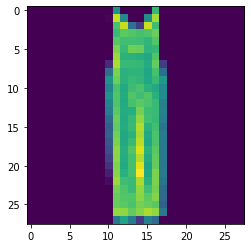

In [36]:
# Display one of the images 
i = 8899
img = train_images[i , : , :]
plt.imshow(img)
print(f'The labels of the image is: {labels[train_labels[i]]}')

In [37]:
tf.rank(train_images), tf.rank(train_images[... , np.newaxis])

(<tf.Tensor: shape=(), dtype=int32, numpy=3>,
 <tf.Tensor: shape=(), dtype=int32, numpy=4>)

In [38]:
tf.rank(train_labels)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [39]:
tf.config.run_functions_eagerly(True)


In [40]:
# Fitting the model 

history = model.fit(train_images[... , np.newaxis] , train_labels , epochs = 10 , 
                    batch_size = 256)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/10
235/235 [==============================] - 19s 82ms/step - loss: 0.8011 - sparse_categorical_accuracy: 0.7218 - mean_absolute_error: 4.4243
Epoch 2/10
235/235 [==============================] - 19s 82ms/step - loss: 0.3814 - sparse_categorical_accuracy: 0.8653 - mean_absolute_error: 4.4273
Epoch 3/10
235/235 [==============================] - 19s 82ms/step - loss: 0.3438 - sparse_categorical_accuracy: 0.8789 - mean_absolute_error: 4.4464
Epoch 4/10
235/235 [==============================] - 19s 82ms/step - loss: 0.3135 - sparse_categorical_accuracy: 0.8893 - mean_absolute_error: 4.4356
Epoch 5/10
235/235 [==============================] - 19s 82ms/step - loss: 0.3077 - sparse_categorical_accuracy: 0.8886 - mean_absolute_error: 4.4368
Epoch 6/10
235/235 [==============================] - 19s 82ms/step - loss: 0.2993 - sparse_categorical_accuracy: 0.8932 - mean_absolute_error: 4.4042
Epoch 7/10
235/235 [==============================] - 19s 82ms/step - loss: 0.2867 - sparse_ca

In [41]:
# Our history dataframe 

import pandas as pd 
df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.549544,0.807683,4.420001
1,0.369001,0.869733,4.420001
2,0.337771,0.880667,4.420001
3,0.315880,0.888167,4.420000
4,0.305842,0.890500,4.419999


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

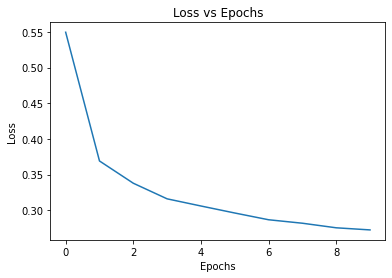

In [42]:
# Make a plot for the loss 

loss_plot = df.plot(y = 'loss' , title = 'Loss vs Epochs' , legend = False)
loss_plot.set(xlabel = 'Epochs' , ylabel = 'Loss')

### Evaluate and Predict methods

In [43]:
# Evaluate on the test dataset 

tets_loss , test_accuracy , test_mae =  model.evaluate(test_images[... , np.newaxis] , test_labels)

  8/313 [..............................] - ETA: 4s - loss: 0.2955 - sparse_categorical_accuracy: 0.8984 - mean_absolute_error: 4.1930

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


313/313 [==============================] - 5s 14ms/step - loss: 0.3091 - sparse_categorical_accuracy: 0.8899 - mean_absolute_error: 4.4200


In [44]:
test_images[np.newaxis,...,np.newaxis].shape

(1, 10000, 28, 28, 1)

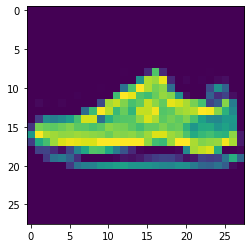

Label: Sneaker


In [45]:
# Make predictions from the model 

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f'Label: {labels[test_labels[random_inx]]}')

## Validation ,Regularizations and Callbacks 



### Validation Sets
Validation set is used to measure how well our models performing outside the training set.

In [46]:
# Loading the data 

from sklearn.datasets import load_diabetes 
diabetes_dataset = load_diabetes()

In [47]:
# Save the input and target variab;e 

inputs = diabetes_dataset['data']
targets = diabetes_dataset['target']

# Checking the shape 
inputs.shape , targets.shape

((442, 10), (442,))

In [48]:
# Spread of targets 
min(targets) , max(targets)

(25.0, 346.0)

In [49]:
# Since there is huge spread in targets,normalizing the target data (will make clearer training curve )

targets = (targets - targets.mean(axis = 0)) / targets.std() 
targets

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [50]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
train_data , test_data , train_targets , test_targets = train_test_split(inputs , targets , test_size = 0.2)

train_data.shape , train_targets.shape , test_data.shape , test_targets.shape

((353, 10), (353,), (89, 10), (89,))

**Train a feeforward neural network model** 


In [51]:
# Importing the things we need 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
  model = Sequential([
    Dense(128 , activation= 'relu' , input_shape = (train_data.shape[1], )),
    Dense(128 , activation = 'relu'),
    Dense(128 , activation= 'relu'), 
    Dense(128 , activation='relu'), 
    Dense(128 , activation='relu'), 
    Dense(128 , activation='relu'), 
    Dense(1)
  ])

  return model 

# Instantiating the model 
model = get_model()

# SUmmary of the model 
model.summary()



Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_20 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_21 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_22 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_23 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_24 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_25 (Dense)             (None, 1)               

In [52]:
train_data.shape[1]

10

In [53]:
# Compile the model 
model.compile(optimizer= 'adam' , 
              loss = 'mse' , 
              metrics = ['mae'])

In [54]:
# Train the model 
history = model.fit(train_data , train_targets , epochs = 100 , 
                    validation_split = 0.15 , batch_size = 64 , 
                    verbose = False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


In [55]:
# Evaluate the model on test data 
model.evaluate(test_data , test_targets)

3/3 [==============================] - 0s 10ms/step - loss: 0.7886 - mae: 0.6769


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


[0.7886197566986084, 0.6769163012504578]

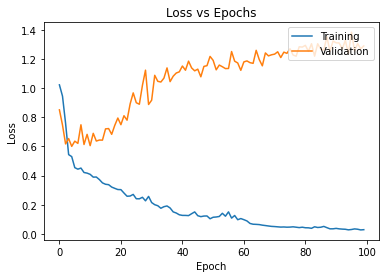

In [56]:
# Plotting the learning curves 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training' , 'Validation'] , loc = 'upper right')
plt.show()

Hmm.. our model is severly overfitting. Let's in next module how to overcome this!

### Regularizations 

Techniques used to avoid overfitting into the model training and have the effect of constraining the model capacity in preventing overfitting. 

We'll look at: 
- **L2 regularization** -> weight decay in neural network. 
- **L1 regularization** 
- How to use Dropouts in our models 


In [57]:
# Creating model with regularization works for both Dense and Conv layers 

model = Sequential([
  Dense(64 , activation= 'relu' , 
        kernel_regularizer = tf.keras.regularizers.l2(0.001)), 
  
])

# Compile the model 
model.compile(loss = 'binary_crossentropy' , 
              optimizer = 'adadelta' , 
              metrics = ['acc'])

# Fitting 
# model.fit(inputs ,targts , validation_split= 0.2)

In [58]:
# Let's look into l1 regularizers 

model = Sequential([
  Dense(64 , activation = 'relu' , 
        kernel_regularizer = tf.keras.regularizers.l1(0.005)) ,
  Dense(1 , activation = 'sigmoid')
])


In [59]:
# Using both l1 and l2 regularizers

model = Sequential([
  Dense(64 , activation = 'relu' , 
        kernel_regularizer = tf.keras.regularizers.l1_l2(l1 = 0.005 , 
                                                         l2 = 0.001)) ,
  Dense(1 , activation = 'sigmoid')
])


**Regularizer for Bias** 

In [60]:
# Regularizer for bias

model = Sequential([
  Dense(64 , activation = 'relu' , 
        kernel_regularizer = tf.keras.regularizers.l1_l2(l1 = 0.005 ,l2 = 0.001) , 
        bias_regularizer = tf.keras.regularizers.l2(0.001)) ,
  Dense(1 , activation = 'sigmoid')
])


**Dropout layer**

Dropout also has a regularizing effect on the neural network. We can add it as just like another layer. 

The dropout layer accepts an argument called `dropout_rate`, 
- the rate has been set to 0.5. 
- that mean that each weight connection between two dense layers is set to **zero** with probability 0.5. 
This is also known as **Bernoulli Dropout**, since the weights are effectively being multiplied by a bernoulli random variable. 

Each of the weights are randomly dropped out independently from one another and Dropout has also applied independently across each element in the batch at training time.

In [61]:
# Dropout layer
model = Sequential([
  Dense(64 , activation = 'relu' , 
        kernel_regularizer = tf.keras.regularizers.l1_l2(l1 = 0.005 ,l2 = 0.001) , 
        bias_regularizer = tf.keras.regularizers.l2(0.001)) ,
  tf.keras.layers.Dropout(0.5),
  Dense(1 , activation = 'sigmoid')
])


There are certain mode which comes when we use `Dropout` layer,
- Training mode , with dropout. Here the weights will get dropped randomly during training .This happens during the `model.fit()` method.
- Testing mode, no dropout. We stop dropping the weights randomly here. This happens during the methods, 
  - `model.evaluate()`
  - `model.predict()`
These two modes are handled behind the scenes. 

We can even control this two modes later in the course, by having more control over the model. 

In [62]:
# Getting back our overfitting model to fix it 
# Importing the things we need 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras import regularizers

def get_model(wd , rate):
  '''
  wd --> Weight decay 
  rate --> dropout rate 
  '''
  model = Sequential([
    Dense(128 , activation= 'relu' ,
          kernel_regularizer = regularizers.l2(wd), input_shape = (train_data.shape[1], )),
    Dropout(rate),
    Dense(128 , activation = 'relu' , kernel_regularizer = regularizers.l2(wd)),
    Dropout(rate),
    Dense(128 , activation= 'relu' , kernel_regularizer = regularizers.l2(wd)), 
    Dropout(rate),
    Dense(128 , activation='relu', kernel_regularizer = regularizers.l2(wd)), 
    Dropout(rate),
    Dense(128 , activation='relu' , kernel_regularizer = regularizers.l2(wd)), 
    Dropout(rate),
    Dense(128 , activation='relu' , kernel_regularizer = regularizers.l2(wd)), 
    Dropout(rate),
    Dense(1)
  ])

  return model 

# Instantiating the model 
model = get_model(1e-5 , 0.3)

# SUmmary of the model 
model.summary()



Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 128)               1408      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)             

In [63]:
# Compile the model 
model.compile(loss = 'mse' , 
              optimizer = 'adam' , 
              metrics = ['mae'])

# Training the model and see the performance 
history = model.fit(train_data , train_targets , validation_split = 0.2 ,
                    epochs = 100 , batch_size = 64)

Epoch 1/100
5/5 [==============================] - ETA: 0s - loss: 1.0008 - mae: 0.8587

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


5/5 [==============================] - 0s 58ms/step - loss: 1.0001 - mae: 0.8581 - val_loss: 1.0816 - val_mae: 0.8351
Epoch 2/100
5/5 [==============================] - 0s 42ms/step - loss: 0.9054 - mae: 0.8138 - val_loss: 1.0636 - val_mae: 0.8287
Epoch 3/100
5/5 [==============================] - 0s 44ms/step - loss: 1.0206 - mae: 0.8772 - val_loss: 1.0012 - val_mae: 0.8060
Epoch 4/100
5/5 [==============================] - 0s 47ms/step - loss: 1.0033 - mae: 0.8604 - val_loss: 0.9463 - val_mae: 0.7804
Epoch 5/100
5/5 [==============================] - 0s 47ms/step - loss: 0.8877 - mae: 0.8113 - val_loss: 0.8040 - val_mae: 0.7204
Epoch 6/100
5/5 [==============================] - 0s 44ms/step - loss: 0.7385 - mae: 0.7393 - val_loss: 0.6617 - val_mae: 0.6517
Epoch 7/100
5/5 [==============================] - 0s 42ms/step - loss: 0.6514 - mae: 0.6680 - val_loss: 0.6780 - val_mae: 0.6533
Epoch 8/100
5/5 [==============================] - 0s 45ms/step - loss: 0.6430 - mae: 0.6317 - val_los

In [64]:
# Evaluate the performance of the model on test data 
model.evaluate(test_data , test_targets)

3/3 [==============================] - 0s 14ms/step - loss: 0.5911 - mae: 0.6056


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


[0.5910794734954834, 0.6055697202682495]

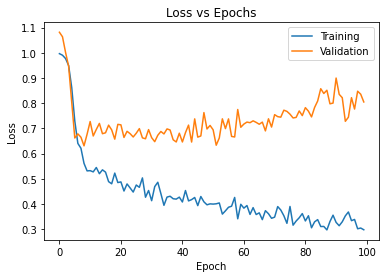

In [65]:
# Plotting the learning curves 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training' , 'Validation'] , loc = 'upper right')
plt.show()

Great!! Our loss is less compared to the un-regularized model. That's brilliant! 

Though the overfitting isn't completely fixed, but our regularizer played an significant effect. 

In [66]:
# Checking our data shapes 
train_data.shape , train_targets.shape , test_data.shape , test_targets.shape

((353, 10), (353,), (89, 10), (89,))

**Batch Normalization** 

We can implement batch normalization into our model by adding it as another layer. 

In [67]:
# Importing the needed things 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense , Conv2D 
from tensorflow.keras.layers import BatchNormalization , Dropout , MaxPooling2D


In [68]:
train_data[1]

array([ 0.06350368, -0.04464164,  0.01750591,  0.02187235,  0.00806271,
        0.02154596, -0.03603757,  0.03430886,  0.01990842,  0.01134862])

Now let's a sequential model with batch normalization 

In [69]:
# Building the model 

model = Sequential([
  Dense(64 , activation= 'relu' , input_shape = (train_data.shape[1] , )), 
  BatchNormalization() , # Batchnormalization layer 
  Dropout(0.5), 
  BatchNormalization() , 
  Dropout(0.5) , 
  Dense(256 , activation= 'relu'),
  ])

In [70]:
# Checking the model summary 
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 64)                704       
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 256)               16640     
Total params: 17,856
Trainable params: 17,600
Non-trainable params: 256
_______________________________________________

**Note:** We gotta add a output layer. 

**Hyperparameters of Batch Normalization**

The idea here is we normalize each layer’s inputs by using the mean and variance of the values in the current mini-batch. 

Some blogs which we can make use of: 
- [Batch Normalization](https://towardsdatascience.com/batch-normalization-8a2e585775c9)


- [Batch Normalization Hyper param tuning](https://medium.com/@ilango100/batchnorm-fine-tune-your-booster-bef9f9493e22#:~:text=Momentum%20is%20the%20%E2%80%9Clag%E2%80%9D%20in,mini%2Dbatch%20can%20be%20ignored.&text=By%20default%2C%20momentum%20would%20be,steps%20run%20will%20be%20more.)

What happens behind the scenes? 

- hyperparm **momentum** is the weighting given to the previous running mean when re-computing it with an extra mini-batch. By default it is set to 0.99. 
- 𝜖 (epsilon) is used for numerical stability when performing the normalization over the mini-batch. By default it is set to 0.001. 
- parameters  𝛽  and  𝛾  are used to implement an affine transformation after normalization. 
  - 𝛽 --> all-zeros vector
  - 𝛾 --> all-ones vector 

Let's customize the parameters of our batch normalization layer. 

In [71]:
# Add a customized batch normalization layer 

model.add(tf.keras.layers.BatchNormalization(
    momentum = 0.95 , # reduce noise due to mini-batch 
    epsilon = 0.005 , 
    axis  =-1 , 
    beta_initializer = tf.keras.initializers.RandomNormal(0.0 , 0.05), 
    gamma_initializer = tf.keras.initializers.Constant(value = 0.5)
))

In [72]:
# Adding a output layer 
model.add(Dense(1))

In [73]:
# Checking the summary of the model now 
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 64)                704       
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 256)               16640     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)             

In [74]:
# Compiling and fit the model 
model.compile(optimizer = 'adam' , 
              loss = 'mse' , 
              metrics = ['mae'])

# Fitting the model 
history = model.fit(train_data , train_targets , epochs = 100 , 
                    validation_split = 0.2 , batch_size = 64 , verbose = False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


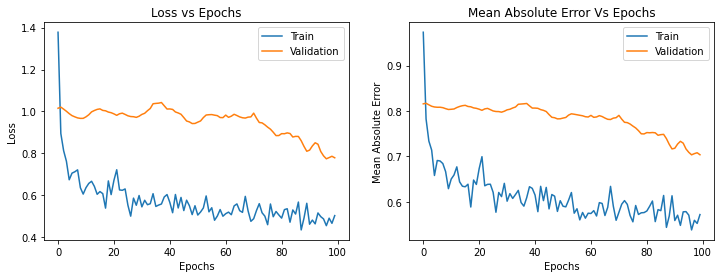

In [75]:
# Plot the learning curves 

frame = pd.DataFrame(history.history)
epochs = np.arange(len(frame))

# setting the figsize 
fig = plt.figure(figsize = (12 , 4))

# Loss plot 
ax = fig.add_subplot(121)
ax.plot(epochs , frame['loss'] , label = 'Train')
ax.plot(epochs , frame['val_loss'] , label = 'Validation')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_title('Loss vs Epochs')
ax.legend()

# Accuracy plot 
ax = fig.add_subplot(122)
ax.plot(epochs , frame['mae'] , label = 'Train')
ax.plot(epochs , frame['val_mae'] , label= 'Validation')
ax.set_xlabel('Epochs')
ax.set_ylabel("Mean Absolute Error")
ax.set_title('Mean Absolute Error Vs Epochs')
ax.legend()

In [76]:
# Evaluating on the test data 
model.evaluate(test_data , test_targets , verbose = 2)

3/3 - 0s - loss: 0.6386 - mae: 0.7115


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


[0.6386370062828064, 0.7115103602409363]

Further readings: 
- https://keras.io/layers/normalization/
- https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/layers/BatchNormalization

### Callbacks

Callbacks not only monitor's the performance it also performance an action on the model depending upon the performance measures.

Callbacks are designed to monitor the loss or metrics at certain point in the training and performs the action depending on the loss or metrics.

In tensorflow all callbacks are stored in `tf.keras.callbacks` module. There is a base class inside this module called `Callback` from where all callbacks inherit from. 

We can create our own callback by passing the base class `Callback` as a sub-class. This base class has series of method which can be overwritten for our new class. 




In [77]:
# Let's create our own callback 
from tensorflow.keras.callbacks import Callback 

# Creating our custom callback 
class MyCallback(Callback):
  def on_train_begin(self , logs = None):
    print('Do something at the start of the training')

  def on_train_batch_begin(self , batch , logs = None):
    print('Do something at the start of every batch iteration')

  def on_epoch_end(self , epoch , logs = None):
    print('Do something at the end of every epoch')

Inside the base class `Callback` module we have alot of methods which we can make use to build our own custom callback.

In [78]:
# Let's build a callback and put it into test 

class TrainingCallback(Callback):

  def on_train_begin(self , logs = None):
    print('Starting training......')

  def on_epoch_begin(self , epoch , logs = None):
    print(f'Starting epoch {epoch}')

  def on_train_batch_begin(self , batch , logs = None):
    print(f'Training starting batch {batch}')

  def on_train_batch_end(self , batch , logs = None):
    print(f'Training finished batch {batch}')

  def on_epoch_end(self , epoch , logs = None):
    print(f'Finished epoch {epoch}')

  def on_train_end(self , logs = None):
    print('Finished training')

In [79]:
# Let's build a model 

model = get_model(wd= 1e-5 , rate = 0.3)

# Summary of the model 
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 128)               1408      
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 128)             

In [80]:
# Compile the model 
model.compile(loss = 'mae' , 
              optimizer = 'adam')

In [81]:
# Fitting the model 
model.fit(train_data , train_targets , epochs = 3 , 
          batch_size = 128 , verbose = False , 
          callbacks = [TrainingCallback()])

Starting training......
Starting epoch 0
Training starting batch 0
Training finished batch 0
Training starting batch 1
Training finished batch 1
Training starting batch 2
Training finished batch 2
Finished epoch 0
Starting epoch 1
Training starting batch 0


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Training finished batch 0
Training starting batch 1
Training finished batch 1
Training starting batch 2
Training finished batch 2
Finished epoch 1
Starting epoch 2
Training starting batch 0
Training finished batch 0
Training starting batch 1
Training finished batch 1
Training starting batch 2
Training finished batch 2
Finished epoch 2
Finished training


We can do the same for Testing. 

In [82]:
class TestingCallback(Callback):

  def on_test_begin(self , logs = None):
    print('Starting testing.....')

  def on_test_batch_begin(self , batch , logs = None):
    print(f'Testing starting batch {batch}')

  def on_test_batch_end(self , batch , logs = None):
    print(f'Testing finished batch {batch}')

  def on_test_end(self , logs = None):
    print('Finished testing.')

In [83]:
# Evaluating the model 

model.evaluate(test_data , test_targets , verbose = False, 
               callbacks = [TestingCallback()])

Starting testing.....
Testing starting batch 0
Testing finished batch 0
Testing starting batch 1
Testing finished batch 1
Testing starting batch 2
Testing finished batch 2
Finished testing.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


0.8439065217971802

Like wise the same we can create for Prediction. 

This will run when we call `model.predict()`

In [84]:
class PredictionCallback(Callback):

  def on_predict_begin(self , logs = None):
    print('Starting prediction....')

  def on_predict_batch_begin(self , batch ,logs = None):
    print(f'Prediction starting batch {batch}')

  def on_predict_batch_end(self , batch , logs = None):
    print(f'Prediction finished batch {batch}')

  def on_predict_end(self , logs = None):
    print('Finished prediction')

In [85]:
# Getting the predictions 
model.predict(test_data , verbose = False , 
              callbacks = [PredictionCallback()])

Starting prediction....
Prediction starting batch 0
Prediction finished batch 0
Prediction starting batch 1
Prediction finished batch 1
Prediction starting batch 2
Prediction finished batch 2
Finished prediction


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


array([[-0.08780918],
       [-0.09500907],
       [-0.0513386 ],
       [-0.07275379],
       [-0.04365427],
       [-0.08245509],
       [-0.09031249],
       [-0.08843934],
       [-0.0818394 ],
       [-0.09445373],
       [-0.0878887 ],
       [-0.07907048],
       [-0.08890282],
       [-0.10088541],
       [-0.08106389],
       [-0.06441698],
       [-0.08417847],
       [-0.07619622],
       [-0.08218729],
       [-0.09870581],
       [-0.08066595],
       [-0.0823923 ],
       [-0.07997068],
       [-0.08133177],
       [-0.080212  ],
       [-0.09025446],
       [-0.06467453],
       [-0.07784573],
       [-0.09257338],
       [-0.07451378],
       [-0.0849902 ],
       [-0.08593323],
       [-0.07846674],
       [-0.07846715],
       [-0.06804517],
       [-0.09314971],
       [-0.04956192],
       [-0.06207285],
       [-0.0971688 ],
       [-0.08803146],
       [-0.09394328],
       [-0.07010538],
       [-0.0893636 ],
       [-0.06834441],
       [-0.08923411],
       [-0

**Logs Dictionary**

We can do better by taking the advantage of `logs` dictionary in Keras to define our own callback and check the progress of a model. 

What does the `logs` dictionary do?
- The `logs` dictionary stores the loss values , along with all of the metrics we are using at the end of a batch or epoch. 
- We can use the information from the `logs` dictionary into our own custom callbacks. 

We're going to experiment with our diabetes dataset 




In [86]:
# Build the model at first 

model = Sequential([
  Dense(128 , activation = 'relu' , input_shape = (train_data.shape[1] , )), 
  Dense(64 , activation = 'relu'), 
  BatchNormalization(), 
  Dense(64 , activation = 'relu'), 
  Dense(64 , activation= 'relu'), 
  Dense(1)
])

# Compile the model 
model.compile(loss = 'mse' , 
              optimizer = 'adam' , 
              metrics = ['mae'])

**Custom callback by using `logs` dictionary**

Will create our custom callback using the `logs` dictionary to access the losss and metric values.

In [87]:
# Creating our own custom callback 

class LossAndMetricCallback(tf.keras.callbacks.Callback):

  # Print the loss after every second batch in training set
  def on_train_batch_end(self , batch , logs = None):
    if batch % 2 == 0: 
      #print(f'After batch {batch}, the loss is {logs['loss']}')
       print('\n After batch {}, the loss is {:7.2f}'.format(batch , logs['loss']))


  # Prints the loss after each batch in the test set 
  def on_test_batch_end(self , batch , logs = None):
    #print(f'After batch {batch} , the loss is {logs['loss']}')
    print('\n After batch {}, the loss is {:7.2f}'.format(batch , logs['loss']))


  # Print the loss and mean absolute erro after each epoch 
  def on_epoch_end(self , epoch , logs = None):
    #print(f'Epoch {epoch}: Average loss is {logs['loss']}, mean absolute error is {logs['mae']}.')
    print('Epoch {}: Average loss is {}, mean absolute error is {}'.format(epoch , logs['loss'] , logs['mae']))


  # Notify the user when prediction has finished on each batch 
  def on_predict_batch_end(self , batch , logs = None):
    print(f'Finished prediction on batch {batch}')

Now let's fit the model to our data and use our custom callback. 

In [88]:
# Training the model 

history = model.fit(train_data , train_targets , epochs = 20 , 
                    batch_size = 100 , 
                    callbacks = [LossAndMetricCallback()] , 
                    verbose = False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "



 After batch 0, the loss is    0.92

 After batch 2, the loss is    0.95
Epoch 0: Average loss is 0.9429743885993958, mean absolute error is 0.8353925943374634

 After batch 0, the loss is    0.85

 After batch 2, the loss is    0.74
Epoch 1: Average loss is 0.7249260544776917, mean absolute error is 0.72306227684021

 After batch 0, the loss is    0.59

 After batch 2, the loss is    0.57
Epoch 2: Average loss is 0.5637138485908508, mean absolute error is 0.626350998878479

 After batch 0, the loss is    0.54

 After batch 2, the loss is    0.51
Epoch 3: Average loss is 0.5015842914581299, mean absolute error is 0.5765392184257507

 After batch 0, the loss is    0.44

 After batch 2, the loss is    0.45
Epoch 4: Average loss is 0.4658781588077545, mean absolute error is 0.549201488494873

 After batch 0, the loss is    0.43

 After batch 2, the loss is    0.46
Epoch 5: Average loss is 0.4506192207336426, mean absolute error is 0.5368654727935791

 After batch 0, the loss is    0.53



We can also use our callback in the `evaluate` function.

In [89]:
# Evaluate the model 
model.evaluate(test_data , test_targets , batch_size = 10 , 
               callbacks = [LossAndMetricCallback()] , 
               verbose = False)


 After batch 0, the loss is    0.98

 After batch 1, the loss is    0.80

 After batch 2, the loss is    0.79

 After batch 3, the loss is    0.84

 After batch 4, the loss is    0.86

 After batch 5, the loss is    0.82

 After batch 6, the loss is    0.84

 After batch 7, the loss is    0.86

 After batch 8, the loss is    0.85


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


[0.8504957556724548, 0.8171901106834412]

Also use in the `predict` function

In [90]:
# Get predictions from the model 
model_pred = model.predict(test_data , batch_size = 10 , 
                           callbacks = [LossAndMetricCallback()] , 
                           verbose = False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Finished prediction on batch 0
Finished prediction on batch 1
Finished prediction on batch 2
Finished prediction on batch 3
Finished prediction on batch 4
Finished prediction on batch 5
Finished prediction on batch 6
Finished prediction on batch 7
Finished prediction on batch 8


Alright we're building some random callbacks which is of no use at all. In here we will build a callback that will be a big help during our training.

- We're going to define a callback to change the learning rate of the optimizer of a model during training. 
- Will do this by specifying the epochs and new learning rates where we would like it to be changed. 

Let's create an auxiliary function that return the learning rate for each epoch based on our schedule. 

In [91]:
# Define a learning rate schedule. 

# Tuples below are (start_epoch , learning_rate)
lr_schedule = [
  (4 , 0.03) , (7 , 0.02) , (11 , 0.005) , (15 , 0.007)
]

# Defining the function that will help us 
def get_new_epoch_lr(epoch , lr):
  '''
  Checks to see if the input epoch is listed in the learning rate schedule (tuple above)
  If it does, returns index in lr_schedule

  '''
  epoch_in_sched = [i for i in range(len(lr_schedule)) if lr_schedule[i][0] == int(epoch)]
  if len(epoch_in_sched) > 0:
    # Return the lr inside the tuple to that epoch 
    return lr_schedule[epoch_in_sched[0]][1]

  else:
    return lr


In [92]:
# Let's now create a Class of our custom callback 

class LRScheduler(tf.keras.callbacks.Callback):

  def __init__(self , new_lr):
    super(LRScheduler , self).__init__()
    # Add the new lr function to our callback 
    self.new_lr = new_lr

  # Adding a method 
  def on_epoch_begin(self , epoch , logs = None):
    #Optimizer should have chosen a learning rate, if not raises error
    if not hasattr(self.model.optimizer , 'lr'):
      raise ValueError('Error: Optimizer does not have a learning rate')

    # Get the current learning 
    curr_rate = float(tf.keras.backend.get_value(self.model.optimizer.lr))

    # Call auxillary functions to get the scheduled learning rate (tuple one)
    scheduled_rate = self.new_lr(epoch , curr_rate)

    # Set the learning rate to the scheduled learning rate 
    tf.keras.backend.set_value(self.model.optimizer.lr , scheduled_rate)
    print('Learning rate for epoch {} is {:7.3f}'.format(epoch , scheduled_rate))

  

Awesome we created our own custom callback for learning rate scheduling. Let's use this! 

In [93]:
# Build the model 

model = tf.keras.Sequential([
  Dense(128 , activation = 'relu' , input_shape = (train_data.shape[1] ,)), 
  Dense(64 , activation = 'relu'),
  BatchNormalization(), 
  Dense(64 , activation= 'relu'),
  Dense(63 , activation = 'relu'),
  Dense(1)
])

# Compile the model 
model.compile(loss = 'mae' , 
              optimizer = 'adam' , 
              metrics = ['mae' , 'mse'])

In [94]:
# Fit the mdoel with the learning rate scheduler callback 

history = model.fit(train_data , train_targets , epochs = 20 , 
                    batch_size = 100 , 
                    callbacks = [LRScheduler(get_new_epoch_lr)])

Epoch 1/20
Learning rate for epoch 0 is   0.001
4/4 [==============================] - 0s 22ms/step - loss: 0.7928 - mae: 0.7928 - mse: 0.8882


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 2/20
Learning rate for epoch 1 is   0.001
4/4 [==============================] - 0s 22ms/step - loss: 0.6665 - mae: 0.6665 - mse: 0.6581
Epoch 3/20
Learning rate for epoch 2 is   0.001
4/4 [==============================] - 0s 22ms/step - loss: 0.5916 - mae: 0.5916 - mse: 0.5451
Epoch 4/20
Learning rate for epoch 3 is   0.001
4/4 [==============================] - 0s 21ms/step - loss: 0.5508 - mae: 0.5508 - mse: 0.4902
Epoch 5/20
Learning rate for epoch 4 is   0.030
4/4 [==============================] - 0s 20ms/step - loss: 0.6624 - mae: 0.6624 - mse: 0.7947
Epoch 6/20
Learning rate for epoch 5 is   0.030
4/4 [==============================] - 0s 21ms/step - loss: 0.6856 - mae: 0.6856 - mse: 0.7171
Epoch 7/20
Learning rate for epoch 6 is   0.030
4/4 [==============================] - 0s 26ms/step - loss: 0.6635 - mae: 0.6635 - mse: 0.6544
Epoch 8/20
Learning rate for epoch 7 is   0.020
4/4 [==============================] - 0s 24ms/step - loss: 0.5944 - mae: 0.5944 - mse: 0.5415

Further readings: 
- https://www.tensorflow.org/guide/keras/custom_callback
- https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback
- https://www.tensorflow.org/guide/keras/custom_callback

#### Early Stopping Callbacks and Patience

Early stopping callback is another regularization approach. 

**What it does?**

This callback monitors the performance of the network for every epoch on a held out **validation set** during the training run. 

And terminate the training conditional on the validation performance. 

`tf.keras.callbacks.EarlyStopping`

It has the following parameters: 
- `monitor = 'val_accuracy'`: this monitors the validation accuracy during the training. This is the performance measure (default setting)
- `patience = 5`: by default it is set to 0. It means as soon as the performance measure gets worse from one epoch to another, then the training is terminated. In our case the training will terminate by monitoring the performance measure for 5 epochs.
- `min_delta = 0.01` : this denotes what qualifies as an improvement for the monitor performance measure. In our case our val accuracy should improve by atleast 0.01 to qualify as an imrovement. 
- `mode = 'max'` : depending on our quantity our performance increases or decrease. For **val loss** the mode will be min because we expect our measure to decrease, and it's opposite with val accuracy. By default it's `auto` which means tensorflow will set it depending upon your monitor performance measure. 

In [95]:
def unreg_model():
    model = Sequential([
        Dense(128, activation="relu", input_shape=(train_data.shape[1],)),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(1)
    ])
    return model

# Getting the model 
unreg_model = unreg_model()

# Compile the model 
unreg_model.compile(loss = 'mae' , 
              optimizer = 'adam')

# Fit the model 
unreg_history = unreg_model.fit(train_data , train_targets , 
                                epochs= 100 , 
                                validation_split = 0.15 , batch_size = 64 , 
                                verbose = False , 
                                callbacks = [tf.keras.callbacks.EarlyStopping()])


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


In [96]:
# Evaluate the model on test data 

unreg_model.evaluate(test_data , test_targets , verbose = 2)

3/3 - 0s - loss: 0.5680


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


0.5680274367332458

In [97]:
# Now using the regularized model
reg_model = get_model(1e-8 , 0.2)

# Compiling the model
reg_model.compile(loss = 'mae' , 
                  optimizer = 'adam')

# Fit the model 
reg_history = reg_model.fit(train_data , train_targets ,
                            epochs = 100 , 
                            validation_split = 0.15 , 
                            batch_size = 64 , 
                            verbose = False , 
                            callbacks = [tf.keras.callbacks.EarlyStopping()])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


In [98]:
# Evaluate on the test data 

reg_model.evaluate(test_data , test_targets , verbose = 2)

3/3 - 0s - loss: 0.8251


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


0.8250994086265564

Wow!! By using the `EarlyStoppingCallback` our loss in unregularized model is lowered by a bit. Whereas the regualarized model has little higher loss than our unreg one. 

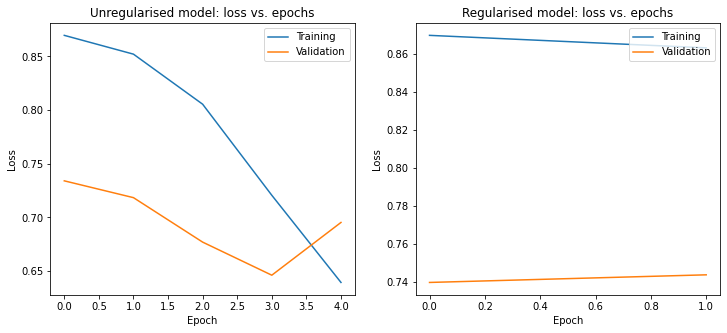

In [99]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()

**Setting patience to 10**

In [100]:
def unreg_model():
    model = Sequential([
        Dense(128, activation="relu", input_shape=(train_data.shape[1],)),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(1)
    ])
    return model

# Getting the model 
unreg_model = unreg_model()

# Compile the model 
unreg_model.compile(loss = 'mae' , 
              optimizer = 'adam')

# Fit the model 
unreg_history = unreg_model.fit(train_data , train_targets , 
                                epochs= 100 , 
                                validation_split = 0.15 , batch_size = 64 , 
                                verbose = False , 
                                callbacks = [tf.keras.callbacks.EarlyStopping(patience=10)])


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


In [101]:
# Evaluating the model 
unreg_model.evaluate(test_data , test_targets ,verbose= 2)

3/3 - 0s - loss: 0.5568


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


0.5568426847457886

In [102]:
# Now using the regularized model
reg_model = get_model(1e-8 , 0.2)

# Compiling the model
reg_model.compile(loss = 'mae' , 
                  optimizer = 'adam')

# Fit the model 
reg_history = reg_model.fit(train_data , train_targets ,
                            epochs = 100 , 
                            validation_split = 0.15 , 
                            batch_size = 64 , 
                            verbose = False , 
                            callbacks = [tf.keras.callbacks.EarlyStopping(patience = 10)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


In [103]:
# Evaluating on test data 
reg_model.evaluate(test_data , test_targets , verbose = 2)

3/3 - 0s - loss: 0.5391


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


0.5391472578048706

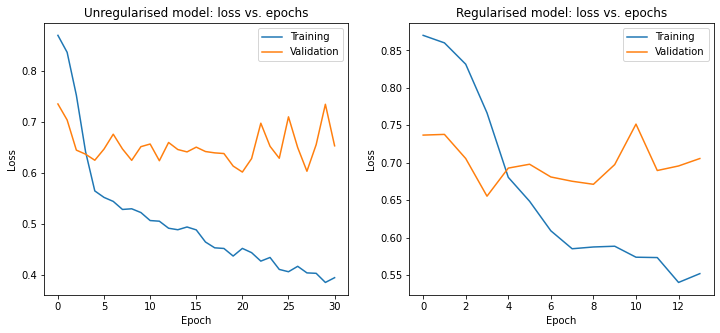

In [104]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()



**Let's reduce the patience to 2 epochs**

In [105]:
def unreg_model():
    model = Sequential([
        Dense(128, activation="relu", input_shape=(train_data.shape[1],)),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(1)
    ])
    return model

# Getting the model 
unreg_model = unreg_model()

# Compile the model 
unreg_model.compile(loss = 'mae' , 
              optimizer = 'adam')

# Fit the model 
unreg_history = unreg_model.fit(train_data , train_targets , 
                                epochs= 100 , 
                                validation_split = 0.15 , batch_size = 64 , 
                                verbose = False , 
                                callbacks = [tf.keras.callbacks.EarlyStopping(patience= 2)])


# Evaluating the model 
unreg_model.evaluate(test_data , test_targets ,verbose= 2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


3/3 - 0s - loss: 0.5424


0.5423784852027893

In [106]:
# Now using the regularized model
reg_model = get_model(1e-8 , 0.2)

# Compiling the model
reg_model.compile(loss = 'mae' , 
                  optimizer = 'adam')

# Fit the model 
reg_history = reg_model.fit(train_data , train_targets ,
                            epochs = 100 , 
                            validation_split = 0.15 , 
                            batch_size = 64 , 
                            verbose = False , 
                            callbacks = [tf.keras.callbacks.EarlyStopping(patience = 2)])

# Evaluating on test data 
reg_model.evaluate(test_data , test_targets , verbose = 2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


3/3 - 0s - loss: 0.5436


0.5435640811920166

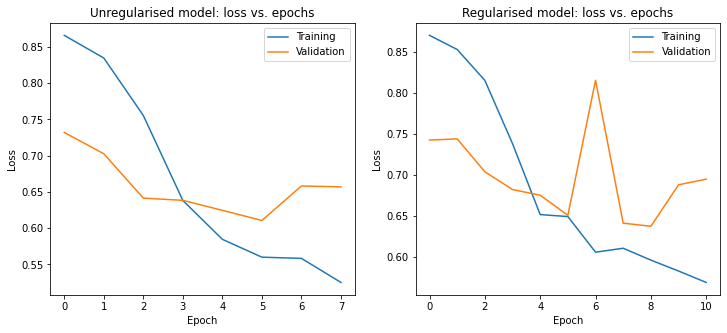

In [107]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()

### Additional Callbacks 

Will look into some of the inbuilt callbacks available in Keras. 

In [108]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()

# Save the input and target variables
from sklearn.model_selection import train_test_split

data = diabetes_dataset['data']
targets = diabetes_dataset['target']

# Split the data set into training and test sets
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = tf.keras.Sequential([
    Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
    Dense(64,activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)        
])

# Compile the model
model.compile(loss='mse',
                optimizer="adam",metrics=["mse","mae"])

##### **Learning Rate Scheduler**

This is the callback which we implemented moments ago as an Custom Callback and also available as built in callback. 

In the `LearningRateScheduler` in Keras takes a function `schedule` as an argument. 

This function `schedule` should take two arguments 
- the current epoch (as an integer)
- the current learning rate 

And it returns new learning rate for the epoch. 

In [113]:
# Defining the schedule function for our LearningRateScheduler

def lr_function(epoch , lr):
  if epoch % 2 == 0:
    return lr
  else:
    return lr + epoch / 1000

lr_schedule_callback = tf.keras.callbacks.LearningRateScheduler(lr_function , verbose= 1)

In [114]:
# Train the model 

history = model.fit(train_data , train_targets , epochs = 10,
                    callbacks = [lr_schedule_callback])

Epoch 1/10

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
 5/13 [==========>...................] - ETA: 0s - loss: 31967.4437 - mse: 31967.4437 - mae: 159.5828

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


13/13 [==============================] - 0s 16ms/step - loss: 30284.1027 - mse: 30284.1027 - mae: 155.1003
Epoch 2/10

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0020000000474974513.
13/13 [==============================] - 0s 15ms/step - loss: 29033.7547 - mse: 29033.7547 - mae: 153.0022
Epoch 3/10

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0020000000949949026.
13/13 [==============================] - 0s 17ms/step - loss: 23416.1575 - mse: 23416.1575 - mae: 133.1260
Epoch 4/10

Epoch 00004: LearningRateScheduler reducing learning rate to 0.005000000094994903.
13/13 [==============================] - 0s 17ms/step - loss: 9687.2261 - mse: 9687.2261 - mae: 79.4066
Epoch 5/10

Epoch 00005: LearningRateScheduler reducing learning rate to 0.004999999888241291.
13/13 [==============================] - 0s 16ms/step - loss: 6303.1722 - mse: 6303.1722 - mae: 59.7293
Epoch 6/10

Epoch 00006: LearningRateScheduler reducing learning rate to 0.00999999988824

In [116]:
# Trying a different lr function

model = tf.keras.Sequential([
    Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
    Dense(64,activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)        
])

# Compile the model
model.compile(loss='mse',
                optimizer="adam",metrics=["mse","mae"])

# Defining the lr_function (Takes a learning rate in)
def lr_xo(x):
  return 1 / (3 + 5 * x)

lr_xo_callback = tf.keras.callbacks.LearningRateScheduler(lr_xo , verbose = 1)

history_lr_xo = model.fit(train_data , train_targets , epochs = 10 , 
                          callbacks = [lr_xo_callback])

Epoch 1/10

Epoch 00001: LearningRateScheduler reducing learning rate to 0.3333333333333333.
 9/13 [===================>..........] - ETA: 0s - loss: 1594284.2344 - mse: 1594284.2344 - mae: 676.1948

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


13/13 [==============================] - 0s 15ms/step - loss: 1273951.2667 - mse: 1273951.2667 - mae: 565.8774
Epoch 2/10

Epoch 00002: LearningRateScheduler reducing learning rate to 0.125.
13/13 [==============================] - 0s 15ms/step - loss: 6864.1870 - mse: 6864.1870 - mae: 68.7599
Epoch 3/10

Epoch 00003: LearningRateScheduler reducing learning rate to 0.07692307692307693.
13/13 [==============================] - 0s 16ms/step - loss: 5822.3543 - mse: 5822.3543 - mae: 65.2140
Epoch 4/10

Epoch 00004: LearningRateScheduler reducing learning rate to 0.05555555555555555.
13/13 [==============================] - 0s 16ms/step - loss: 5637.4975 - mse: 5637.4975 - mae: 62.6412
Epoch 5/10

Epoch 00005: LearningRateScheduler reducing learning rate to 0.043478260869565216.
13/13 [==============================] - 0s 15ms/step - loss: 6067.8236 - mse: 6067.8236 - mae: 66.7893
Epoch 6/10

Epoch 00006: LearningRateScheduler reducing learning rate to 0.03571428571428571.
13/13 [=========

Like wise we can even use `lambda` functions in our `LearningRateScheduler`. 

Let's look at another callback called **CSV logger**. 

##### **CSV logger**

- This callback streams the results from each epoch into a CSV file.
- The first line of the CSV file will be the names of pieces of information recorded on each subsequent line.
- From epoch and loss value, the values of metrics at the end of each epoch will also be recorded. 

The important argument is `filename` for the log to be streamed, can be a filepath. 

The `append` argument allows you the option to append your results to an existing file with the same name. Useful if we're continuing training. 

In [119]:
# Instantiating a CSV logger object 

csv_logger = tf.keras.callbacks.CSVLogger('results.csv')

history = model.fit(train_data , train_targets , epochs = 10 , 
                    callbacks = [csv_logger])

Epoch 1/10
 9/13 [===================>..........] - ETA: 0s - loss: 5854.7759 - mse: 5854.7759 - mae: 65.6864

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


13/13 [==============================] - 0s 16ms/step - loss: 5900.2783 - mse: 5900.2783 - mae: 65.3953
Epoch 2/10
13/13 [==============================] - 0s 15ms/step - loss: 5879.3677 - mse: 5879.3677 - mae: 65.1020
Epoch 3/10
13/13 [==============================] - 0s 16ms/step - loss: 5898.4956 - mse: 5898.4956 - mae: 64.8680
Epoch 4/10
13/13 [==============================] - 0s 18ms/step - loss: 5878.5259 - mse: 5878.5259 - mae: 65.1013
Epoch 5/10
13/13 [==============================] - 0s 16ms/step - loss: 5912.1147 - mse: 5912.1147 - mae: 65.2990
Epoch 6/10
13/13 [==============================] - 0s 16ms/step - loss: 5938.0151 - mse: 5938.0151 - mae: 65.6113
Epoch 7/10
13/13 [==============================] - 0s 17ms/step - loss: 5886.4277 - mse: 5886.4277 - mae: 65.0762
Epoch 8/10
13/13 [==============================] - 0s 18ms/step - loss: 5889.7148 - mse: 5889.7148 - mae: 64.8079
Epoch 9/10
13/13 [==============================] - 0s 16ms/step - loss: 5879.0659 - mse: 5

In [120]:
# Load the csv 
import pandas as pd 

result_logger = pd.read_csv('results.csv' , index_col = 'epoch')
result_logger

,loss,mae,mse
epoch,,,
0,5900.278320,65.395340,5900.278320
1,5879.367676,65.101982,5879.367676
2,5898.495605,64.868011,5898.495605
3,5878.525879,65.101334,5878.525879
4,5912.114746,65.298958,5912.114746
5,5938.015137,65.611290,5938.015137
6,5886.427734,65.076248,5886.427734
7,5889.714844,64.807907,5889.714844
8,5879.065918,64.977951,5879.065918


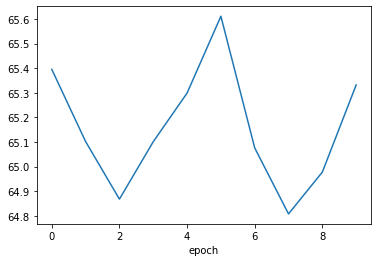

In [121]:
# We can even plot our results 

result_logger['mae'].plot(kind = 'line')

##### **Reduce learning rate on plateau** 

```
tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss', 
            factor=0.1, 
            patience=10, 
            verbose=0, 
            mode='auto', 
            min_delta=0.0001, 
            cooldown=0, 
            min_lr=0)
```

The `ReduceLROnPlateau` callback allows **reduction** of the **learning rate when a metric has stopped improving**.

The arguments are similar to those used in the `EarlyStopping` callback. Let's break them, 
- `monitor` --> which metric to monitor (or) specify base the callback on. 
- `factor` --> this is the factor by which the learning rate decreases, i.e: `new_lr = factor * old_lr`.
- `patience` --> number of epochs where is no improvement on the monitored metric before learning rate is reduced. 
- `verbose` --> helps to prints the progress messages when set to 1. 
- `mode` --> determines whether the learning rate will decrease when the monitored quantity stops increasing (`max`) or decreasing (`min`). The `auto` setting causes the callback to infer the mode from the monitored quantity. 
- `min_delta` --> smallest change in the monitored quantity considered to be an improvement. 
- `cooldown` --> number of epochs to wait after the learning rate is changed before the callback function resumes normal operation. 
- `min_lr` --> is a lower bound on the learning rate that the callback will produce 

In [129]:
# Instantiating the ReduceLROnPlateau callback 

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss' , 
                                                 factor = 0.02 , 
                                                 patience = 2 , 
                                                 mode = 'min')

In [130]:
model = tf.keras.Sequential([
    Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
    Dense(64,activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.4), 
    Dense(64, activation='relu'),
    Dense(1)        
])

# Compile the model
model.compile(loss='mse',
                optimizer="adam",metrics=["mse","mae"])

# Summary of the model 
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_134 (Dense)            (None, 128)               1408      
_________________________________________________________________
dense_135 (Dense)            (None, 64)                8256      
_________________________________________________________________
batch_normalization_8 (Batch (None, 64)                256       
_________________________________________________________________
dense_136 (Dense)            (None, 64)                4160      
_________________________________________________________________
dropout_36 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_137 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_138 (Dense)            (None, 1)               

In [131]:
# Train the model 
history = model.fit(train_data , train_targets , epochs = 100 , 
                    batch_size  = 100 , 
                    callbacks = [reduce_lr] , 
                    validation_split = 0.15)

Epoch 1/100
4/4 [==============================] - ETA: 0s - loss: 28895.3042 - mse: 28895.3042 - mae: 151.6553

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


4/4 [==============================] - 0s 58ms/step - loss: 28668.6707 - mse: 28668.6707 - mae: 150.9874 - val_loss: 32579.1348 - val_mse: 32579.1348 - val_mae: 162.0943
Epoch 2/100
4/4 [==============================] - 0s 43ms/step - loss: 28636.8699 - mse: 28636.8699 - mae: 151.0913 - val_loss: 32553.8203 - val_mse: 32553.8203 - val_mae: 162.0221
Epoch 3/100
4/4 [==============================] - 0s 42ms/step - loss: 27391.4160 - mse: 27391.4160 - mae: 147.8698 - val_loss: 32519.3770 - val_mse: 32519.3770 - val_mae: 161.9263
Epoch 4/100
4/4 [==============================] - 0s 40ms/step - loss: 26179.4480 - mse: 26179.4480 - mae: 144.0821 - val_loss: 32473.1621 - val_mse: 32473.1621 - val_mae: 161.8008
Epoch 5/100
4/4 [==============================] - 0s 39ms/step - loss: 27644.5535 - mse: 27644.5535 - mae: 147.2818 - val_loss: 32411.7773 - val_mse: 32411.7773 - val_mae: 161.6377
Epoch 6/100
4/4 [==============================] - 0s 43ms/step - loss: 27556.0934 - mse: 27556.0934 -

In [132]:
# Evaluating our model 
model.evaluate(test_data , test_targets)

2/2 [==============================] - 0s 15ms/step - loss: 9340.6240 - mse: 9340.6240 - mae: 79.0179


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


[9340.6240234375, 9340.6240234375, 79.0179443359375]

Further reading and resources
* https://keras.io/callbacks/
* https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler
* https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/CSVLogger
* https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LambdaCallback